In [3]:
from ipywidgets import FileUpload
from IPython.display import Audio
import os
import zipfile
import librosa
import shutil
from IPython.display import Image, display
from cy2gen.detectors import BPMDetector
from cy2gen.generators import CytoidLevelGenerator
from cy2gen.generators import MusicConverter

## Step 1: Upload Audio and Background Image

In [3]:
# Upload audio for chart(compulsory)
upload = FileUpload(accept=".mp3", multiple=False)
upload

FileUpload(value=(), accept='.mp3', description='Upload')

In [4]:
os.makedirs("../contents", exist_ok=True)
dirpath_mp3 = os.path.abspath("../contents")
mp3 = os.path.join(dirpath_mp3, 'audio.mp3')
with open(mp3, 'wb') as output_file:
    try:
        content = upload.value[-1]['content']
    except IndexError:
        raise IndexError("You forgot to upload a mp3 in the previous cell!")
    output_file.write(content)
y, sr = librosa.load(mp3)
Audio(data=y, rate=sr)

In [5]:
# Upload background image(optional)
background = FileUpload(multiple=False)
background

FileUpload(value=(), description='Upload')

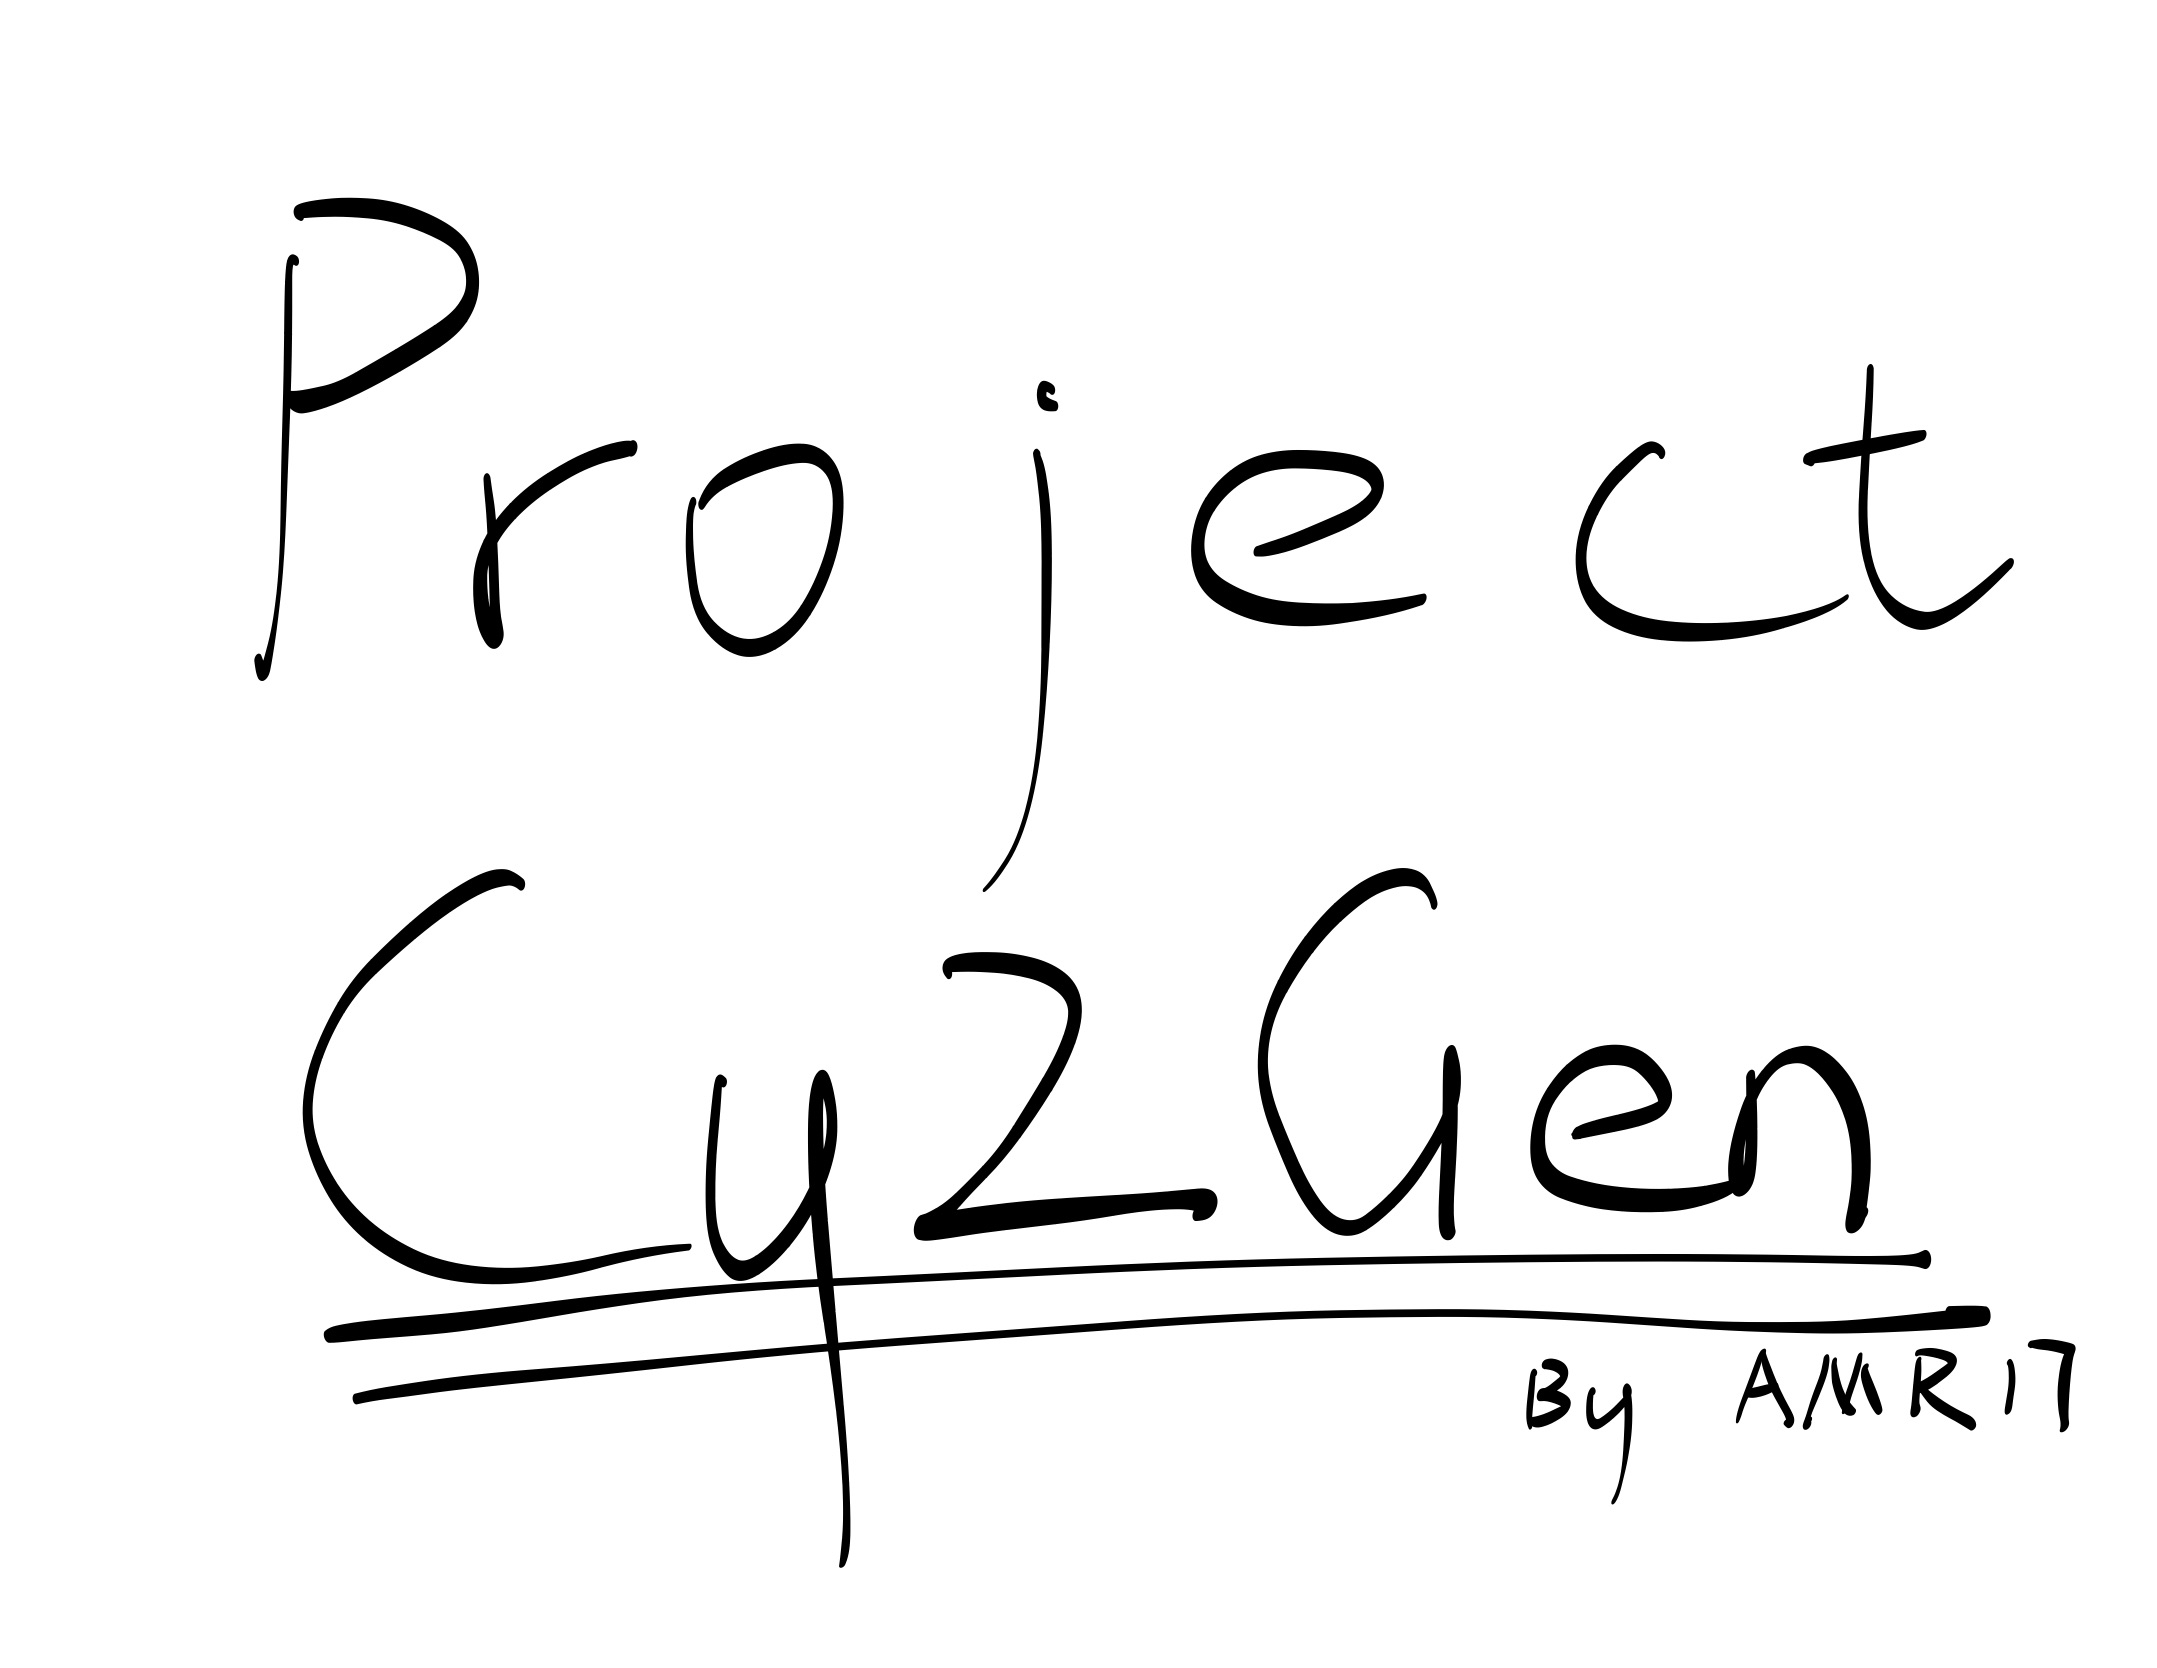

In [10]:
# Write background into file
os.makedirs("../contents", exist_ok=True)
bg = os.path.join("../contents/", 'BG.png')
try:
    content = background.value[-1]["content"]
    with open(bg_path, 'wb') as output_file:
        output_file.write(content)
except (IndexError, NameError):
    shutil.copy("../assets/BG_alter.jpg", bg)

display(Image(filename="../contents/BG.png", width=200, height=200))

## Step 2: Set Chart Information

In [1]:
# Set song information
title = "BM"
artist = "666"
illustrator = "727"

# Set chart information
difficulty = "HARD"  # [EASY, HARD, CHAOS]
pattern = "stream" # now support ["tap", "drill", "stream", "bullet", "jack"]
note_start_side = "left" # ["left", "right"]

print("Successfully set chart information")

Successfully set chart information


In [4]:
# Detect song BPM and timing
detector = BPMDetector()
fbt, ebt, bpm = detector.detect(difficulty)
beat_info = f"The chart bpm is {bpm}, first beat at {fbt} seconds, and last beat at {ebt} seconds"
beat_info

'The chart bpm is 150.0, first beat at 0.19 seconds, and last beat at 58.66 seconds'

## Step 4: Generate .cytoidlevel File

In [5]:
# Create chart level [ex.json], as well as obtain suggested offset
generator = CytoidLevelGenerator(bpm, fbt, ebt)
offset = generator.generate_chart(pattern, note_start_side)

# Create chart configs [level.json]
generator.generate_level(title, artist, illustrator, difficulty)

# Create music preview [pv.mp3]
music = MusicConverter()
music.convert_pv()

In [6]:
# Output .cytoidlevel
folder_path = "../contents"
output_path = (f"../outputs/{title}.cytoidlevel")
os.makedirs("../outputs", exist_ok=True)
with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(folder_path):
        for file in files:
            abs_path = os.path.join(root, file)
            rel_path = os.path.relpath(abs_path, folder_path)
            zipf.write(abs_path, arcname=rel_path)
print(f"Generation succeeded. Suggested local offset: {offset}")

Generation succeeded. Suggested local offset: 0.19
